Sunkara Venkata Krishna 
Vs2539
N16740683


In [2]:
import fbprophet as pro
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
file= pd.read_csv('super_store.csv')
file.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
file.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
file["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Text(0, 0.5, 'Number of Orders')

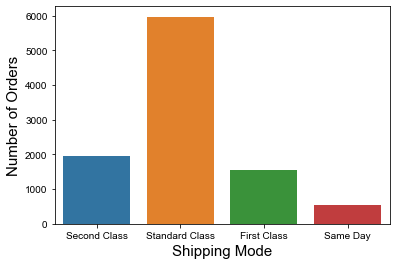

In [5]:
sns.countplot(x='Ship Mode', data = file)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_palette("Paired")
plt.xlabel("Shipping Mode", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [6]:
file["City"].value_counts().head(5)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: City, dtype: int64

Text(0, 0.5, 'Orders in top 10 cities')

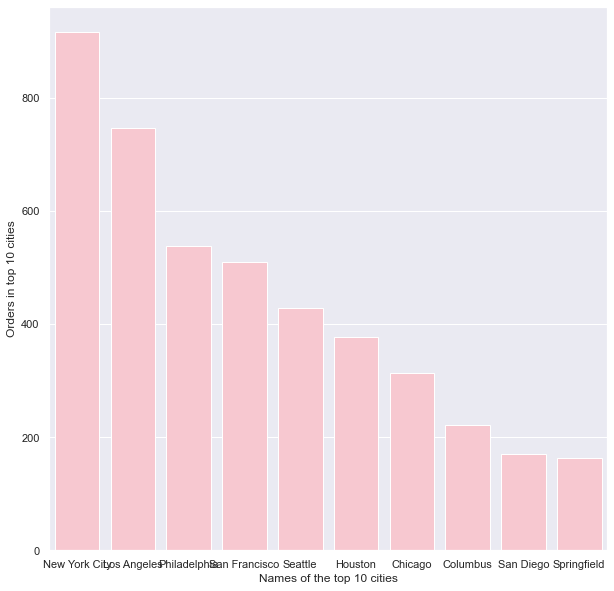

In [7]:
sns.barplot(file["City"].value_counts().head(10).index, file["City"].value_counts().head(10).values, color='pink')
sns.set(rc={'figure.figsize':(15,15)})
plt.xlabel('Names of the top 10 cities')
plt.ylabel('Orders in top 10 cities')


In [8]:
file['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

Text(0, 0.5, 'Orders')

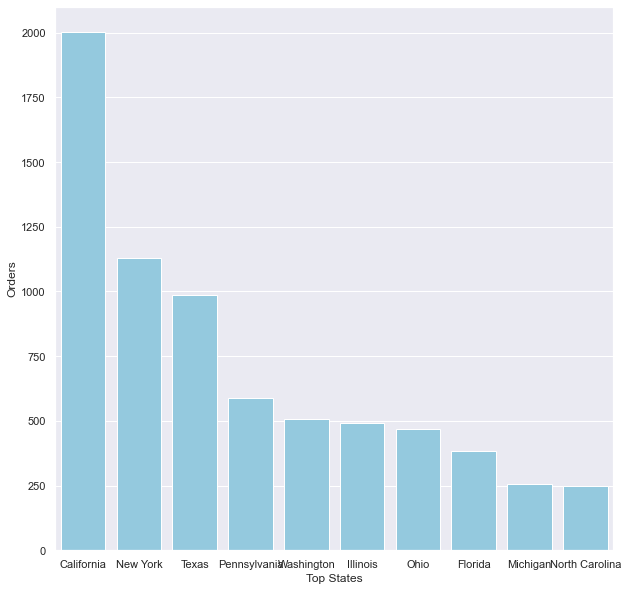

In [107]:
sns.barplot(file['State'].value_counts().head(10).index, file['State'].value_counts().head(10).values, color='Skyblue')
sns.set(rc={'figure.figsize':(15,15)})
plt.xlabel("Top States")
plt.ylabel("Orders")


In [10]:
file['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

Text(0, 0.5, 'Number of Orders')

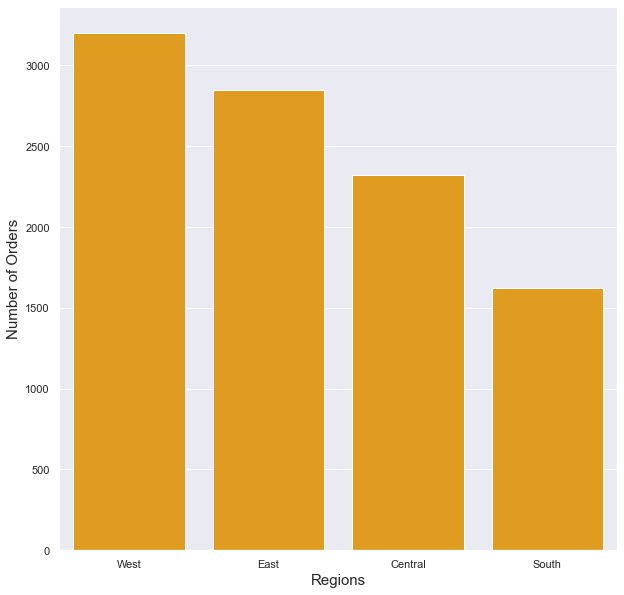

In [109]:
sns.barplot(file['Region'].value_counts().index, file['Region'].value_counts().values, color='orange')
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Regions", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [12]:
file['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdb682d13a0>,
 [Text(-1.0429540846910543, -0.34963806604293685, 'Office Supplies'),
  Text(1.0638343615330323, -0.27974354545119656, 'Furniture'),
  Text(0.6033787837733775, 0.9197467277963863, 'Technology')],
 [Text(-0.5688840461951205, -0.19071167238705644, '60.3%'),
  Text(0.5802732881089266, -0.15258738842792538, '21.2%'),
  Text(0.32911570024002407, 0.5016800333434834, '18.5%')])

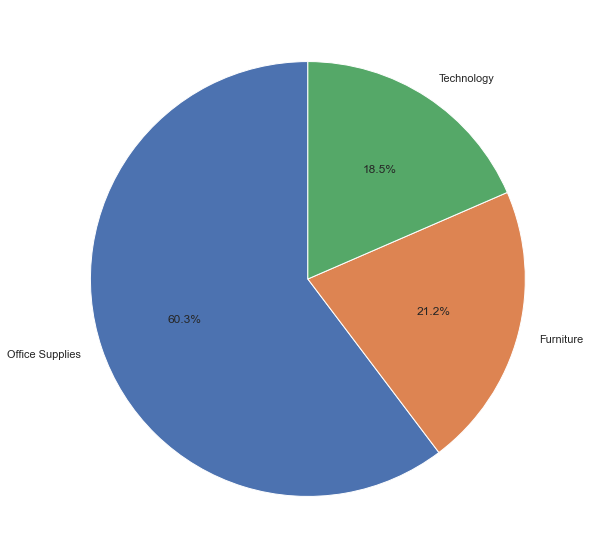

In [13]:
fig,axis = plt.subplots()
x = list(file['Category'].value_counts().index)
y = list(file['Category'].value_counts().values)
axis.pie(y,labels = x, autopct = '%1.1f%%', startangle = 90 )

In [14]:
file['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Text(0, 0.5, 'Sub-Category')

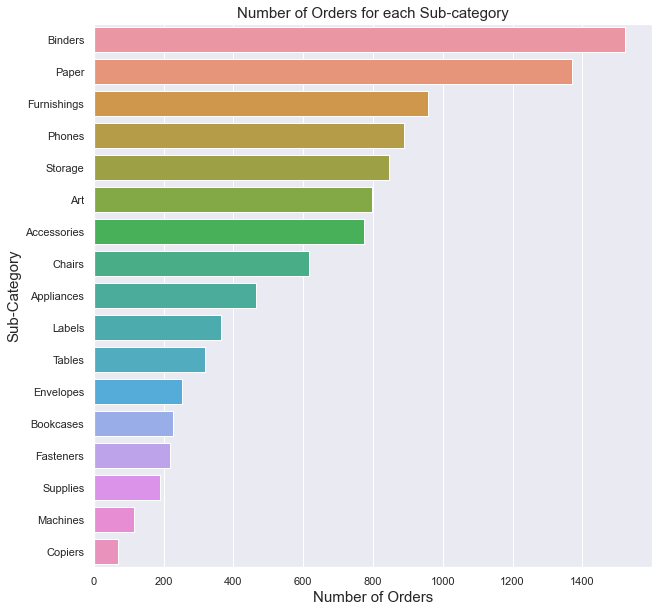

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y="Sub-Category", data=file,order=file["Sub-Category"].value_counts().index)
plt.title("Number of Orders for each Sub-category", fontsize = 15)
plt.xlabel("Number of Orders", fontsize = 15)
plt.ylabel("Sub-Category", fontsize = 15)

In [16]:
sales_sum = pd.pivot_table(file,index=["Customer Name"],values=["Sales"],aggfunc=[np.sum]) 
Top_customers = sales_sum.sort_values(by= [('sum', 'Sales')], ascending=False).head(15)
Top_customers = Top_customers[[('sum', 'Sales')]].round(2)

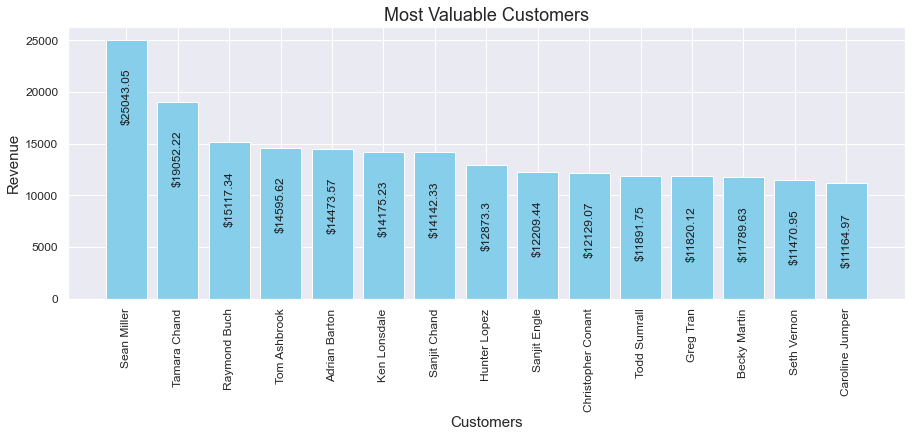

In [143]:
plt.figure(figsize = (15,5)) 
plt.title("Most Valuable Customers", fontsize=18) 
plt.bar(Top_customers.index,Top_customers[('sum', 'Sales')].values,color= 'skyblue', linewidth = 1)
plt.xlabel("Customers",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers[('sum', 'Sales')].items(): 
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [18]:
sales_sum2 = pd.pivot_table(file,index=["State"],values=["Sales"],aggfunc=[np.sum]) #Using Pivot table 
Top_state = sales_sum2.sort_values(by= [('sum', 'Sales')], ascending=False).head(15)
Top_state = Top_state[[('sum', 'Sales')]].round(2)

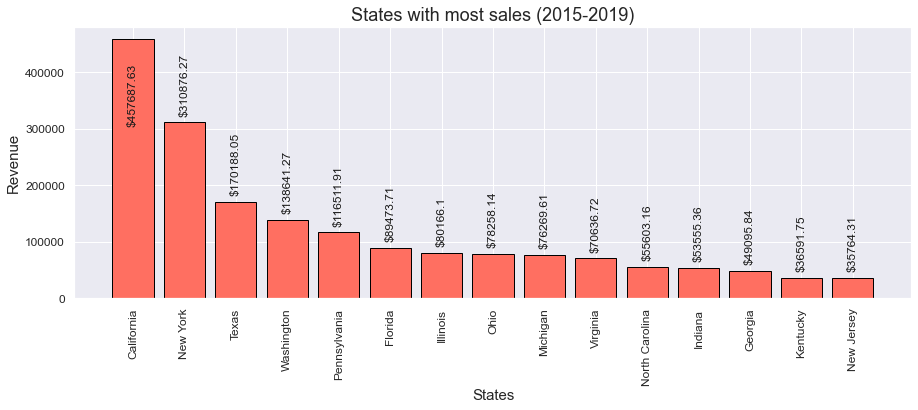

In [19]:
plt.figure(figsize = (15,5)) 
plt.title("States with most sales (2015-2019)", fontsize=18) 
plt.bar(Top_state.index,Top_state[('sum', 'Sales')].values,color= '#FF6F61',edgecolor='black', linewidth = 1)
plt.xlabel("States",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_state[('sum', 'Sales')].items():
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

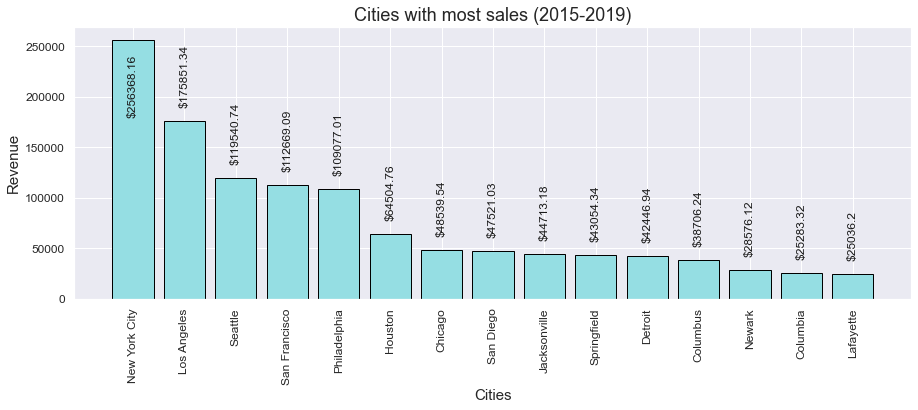

In [20]:
sales_sum3 = pd.pivot_table(file,index=["City"],values=["Sales"],aggfunc=[np.sum]) #Using Pivot table 
Top_city = sales_sum3.sort_values(by= [('sum', 'Sales')], ascending=False).head(15)
Top_city = Top_city[[('sum', 'Sales')]].round(2)
plt.figure(figsize = (15,5)) 
plt.title("Cities with most sales (2015-2019)", fontsize=18) 
plt.bar(Top_city.index,Top_city[('sum', 'Sales')].values,color= '#95DEE3',edgecolor='black', linewidth = 1)
plt.xlabel("Cities",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_city[('sum', 'Sales')].items(): #To show the exact revenue generated on the figure
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [21]:
def conv_dates_series(df, col, old_date_format, new_date_format):

    df[col] = pd.to_datetime(df[col], format=old_date_format).dt.strftime(new_date_format)

    return(df)

In [22]:
data2 = file.copy() 
data2.drop('Row ID',axis = 1, inplace = True)

old_date_format='%d-%m-%Y'
new_date_format='%Y-%m-%d'

data2 = conv_dates_series(data2, "Order Date", old_date_format, new_date_format)

In [23]:
df = data2.sort_values(by = "Order Date")
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,CA-2014-103800,2014-01-03,07-01-2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,CA-2014-112326,2014-01-04,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,CA-2014-112326,2014-01-04,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,CA-2014-112326,2014-01-04,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,CA-2014-141817,2014-01-05,12-01-2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 7980 to 906
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discou

Text(0.5, 1.0, 'Sales')

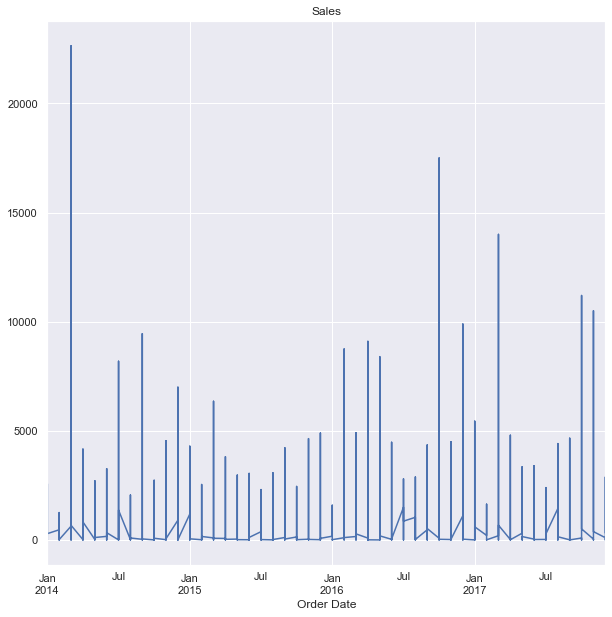

In [129]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.index = pd.PeriodIndex(df["Order Date"], freq='M')

df["Sales"].plot()
plt.title('Sales')

Text(0.5, 1.0, 'Profits')

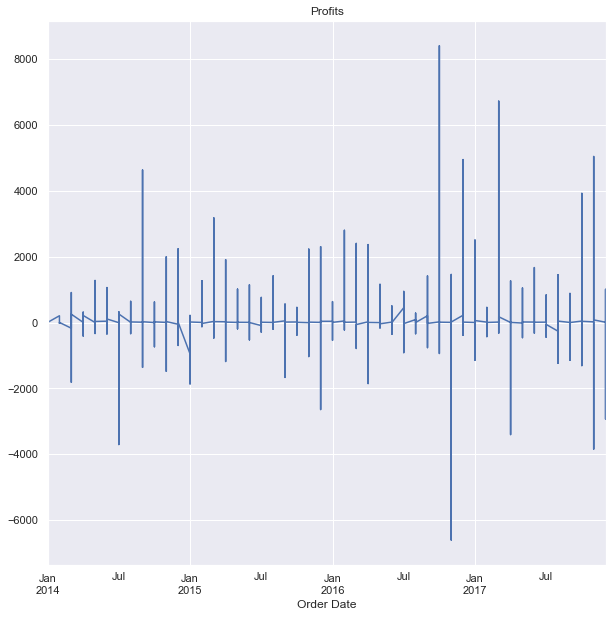

In [130]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.index = pd.PeriodIndex(df["Order Date"], freq='M')

df["Profit"].plot()
plt.title('Profits')

In [26]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01,CA-2014-103800,2014-01-03,07-01-2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01,CA-2014-112326,2014-01-04,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01,CA-2014-112326,2014-01-04,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01,CA-2014-112326,2014-01-04,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01,CA-2014-141817,2014-01-05,12-01-2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [27]:
df['month'] = pd.DatetimeIndex(df['Order Date']).month

df['Year'] = pd.DatetimeIndex(df['Order Date']).year

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,Year
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-01,CA-2014-103800,2014-01-03,07-01-2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,...,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,1,2014
2014-01,CA-2014-112326,2014-01-04,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,1,2014
2014-01,CA-2014-112326,2014-01-04,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,1,2014
2014-01,CA-2014-112326,2014-01-04,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,1,2014
2014-01,CA-2014-141817,2014-01-05,12-01-2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,...,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,1,2014


In [28]:
dataPivot = pd.pivot_table(df, values = "Sales",aggfunc='mean', columns = "Year", index = "month")
dataPivot

Year,2014,2015,2016,2017
month,,,,
1,180.213861,313.346131,208.342596,283.686284
2,98.258522,186.740797,276.853193,189.730219
3,354.719803,280.625014,317.275307,247.362827
4,209.595148,213.720053,227.941406,179.909045
5,193.838418,206.381414,253.278791,182.897150
6,256.260204,179.690522,202.736352,216.251942
7,237.387364,205.466607,195.333149,200.285027
8,182.414827,232.064982,176.791899,289.545358
9,305.139369,220.463884,202.231474,191.430614


In [124]:
dataPivot1 = pd.pivot_table(df, values = "Profit",aggfunc='mean', columns = "Year", index = "month")
dataPivot1

Year,2014,2015,2016,2017
month,,,,
1,31.015072,-56.569086,31.739588,46.067349
2,18.745835,43.966419,60.296139,15.082916
3,3.176624,70.522448,22.159313,61.982737
4,25.843224,26.171851,17.516558,4.597488
5,22.448439,31.971705,38.498428,26.209020
6,36.863144,24.170704,23.871247,33.564636
7,-5.884494,23.490345,22.054119,30.763811
8,34.758856,33.684330,11.716303,41.472274
9,31.074998,28.017620,25.698781,23.946744


Text(0.5, 1.0, 'Profits')

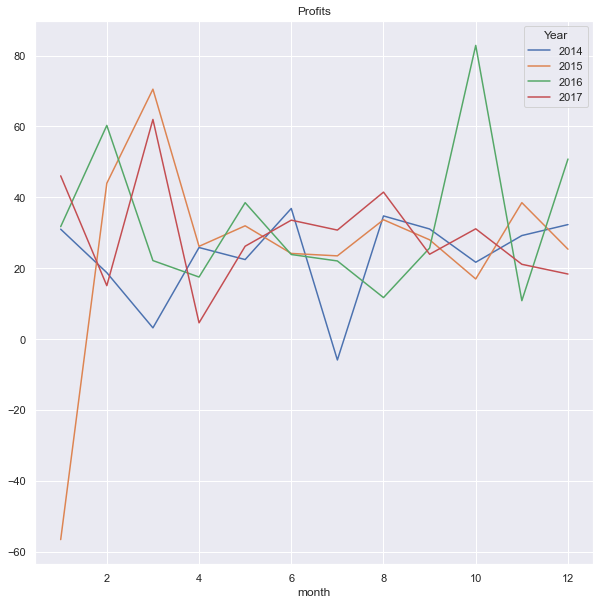

In [119]:
dataPivot1.plot()
plt.title("Profits")

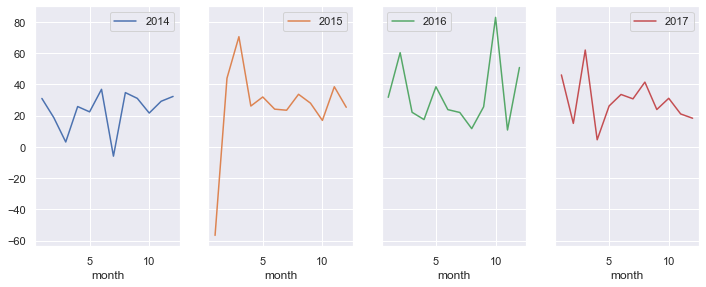

In [122]:
dataPivot1.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)
plt.show()

Text(0.5, 1.0, 'Sales')

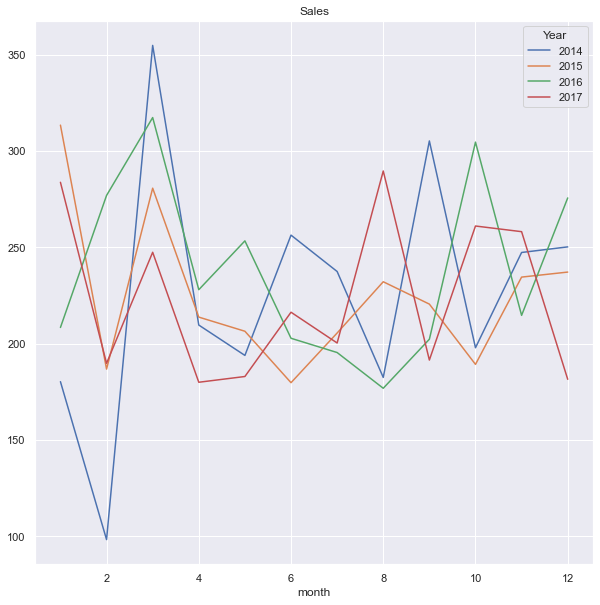

In [123]:
dataPivot.plot()
plt.title('Sales')

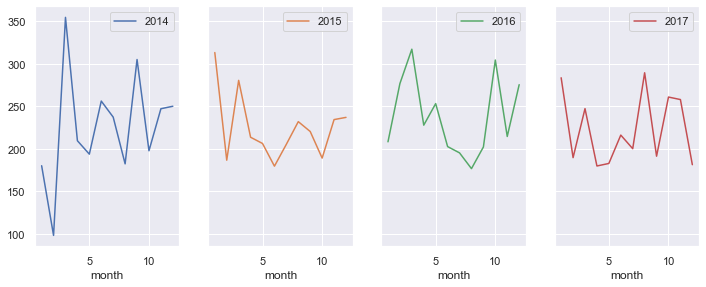

In [125]:
dataPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
file.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [38]:
df_1 = file.copy()
df_1['Order Date'] = pd.to_datetime(df_1['Order Date'], format='%d-%m-%Y')#sorting data by order date
df_1.sort_values(by=['Order Date'], inplace=True, ascending=True) 
df_1.set_index("Order Date", inplace = True)
df_1['time'] = df_1.index.to_series().apply(lambda x: x.toordinal())

# Splitting the data into 70:30
X_train, X_test = df_1[['time']][:int(df_1.shape[0]*0.7)], df_1[['time']][int(df_1.shape[0]*0.7):]
y_train, y_test = df_1['Sales'][:int(df_1.shape[0]*0.7)], df_1['Sales'][int(df_1.shape[0]*0.7):]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6995, 1), (6995,), (2999, 1), (2999,))

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)

print('RMSE on train: ', mean_squared_error(y_train, lr_pred_train, squared=False))
lr_pred = lr.predict(X_test)

print('RMSE on test: ', mean_squared_error(y_test, lr_pred, squared=False))

RMSE on train:  637.3606526762836
RMSE on test:  588.8268668726282


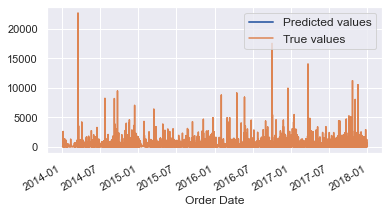

In [41]:
def plot_predict(ts, x_test, y_pred):
    plt.figure(figsize=(6, 3))
    plt.plot(x_test.index, y_pred, label = 'Predicted values', linewidth=2)
    ts.plot(label = 'True values')
    plt.legend(loc = 'best', fontsize = 12)
    plt.xlabel('Order Date', fontsize = 12)
    plt.show()
plot_predict(df_1['Sales'], X_test, lr_pred)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

# check perfromance score
scores_lr = cross_val_score(LinearRegression(), 
                            X_train, y_train, 
                            cv=TimeSeriesSplit(n_splits=10),
                            scoring="neg_mean_squared_error")
np.mean(scores_lr)

-351125.3827629725

In [47]:
file['Order Date'] = pd.to_datetime(file['Order Date'], format='%d-%m-%Y')
file['Ship Date'] = pd.to_datetime(file['Ship Date'], format='%d-%m-%Y') 
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [56]:
file.drop('Row ID',axis = 1, inplace = True)
#sorting data by order date
file.sort_values(by=['Order Date'], inplace=True, ascending=True) 
data_new = pd.DataFrame(file['Sales'])
print(data_new.head())
data_new.tail()

              Sales
Order Date         
2014-01-03   16.448
2014-01-04   11.784
2014-01-04  272.736
2014-01-04    3.540
2014-01-05   19.536


,Sales
Order Date,
2017-12-30,13.904
2017-12-30,20.720
2017-12-30,209.300
2017-12-30,3.024
2017-12-30,323.136


In [57]:
data_new =  pd.DataFrame(data_new['Sales'].resample('D').mean())
data_new = data_new.interpolate(method='linear') 
#It ignore the index and treats the values as equally spaced.

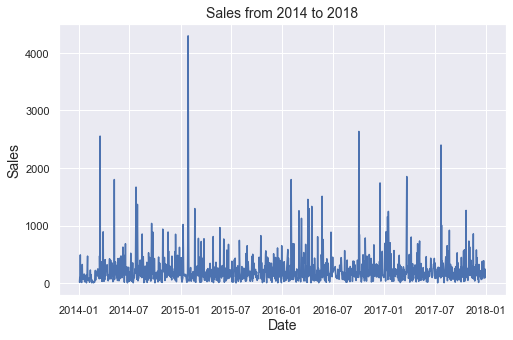

In [59]:
# Visualize the time series
plt.figure(figsize=(8, 5))

plt.plot(data_new.index, data_new.Sales)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.title('Sales from 2014 to 2018', fontsize = 14)
plt.show()

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(data_new['Sales'], model='additive', extrapolate_trend='freq')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(data_new['Sales'], model='multiplicative', extrapolate_trend='freq')

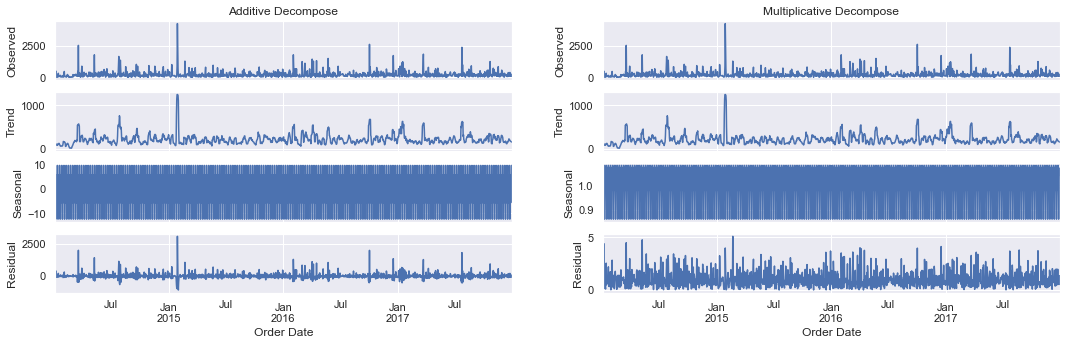

In [63]:
def plotseasonal(res, axes, suptitle):
    res.observed.plot(ax=axes[0])
    axes[0].set_ylabel('Observed', fontsize=12)
    axes[0].set_title(suptitle, fontsize=12)
    res.trend.plot(ax=axes[1])
    axes[1].set_ylabel('Trend', fontsize=12)
    res.seasonal.plot(ax=axes[2])
    axes[2].set_ylabel('Seasonal', fontsize=12)
    res.resid.plot(ax=axes[3])
    axes[3].set_ylabel('Residual', fontsize=12)
    
    
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(18,5))

plotseasonal(result_add, axes[:,0], 'Additive Decompose')
plotseasonal(result_mul, axes[:,1], 'Multiplicative Decompose')

In [64]:
from statsmodels.tsa.stattools import adfuller, kpss

def test_stationarity(ts, do_adf=True, do_kpss = False):
    
    # Determing rolling statistics
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()

    #rolling statistics:
    plt.figure(figsize=(8, 5))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best', fontsize=12)
    plt.title('Rolling Mean & Standard Deviation', fontsize=12)
    plt.xlabel('Date', fontsize = 12)
    plt.ylabel('Sales', fontsize = 12)
    plt.show(block=False)
    
    if do_adf:
        # Perform Augmented Dickey-Fuller test:
        print('Results of ADF Test:')
        dftest = adfuller(ts, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
    
    print() 
    
    if do_kpss:
        # Perform Kwiatkowski-Phillips-Schmidt-Shin test:
        print('Results of KPSS Test:')
        dftest = kpss(ts, regression='c')
        dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value','Truncated Lag #'])
        for key,value in dftest[3].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

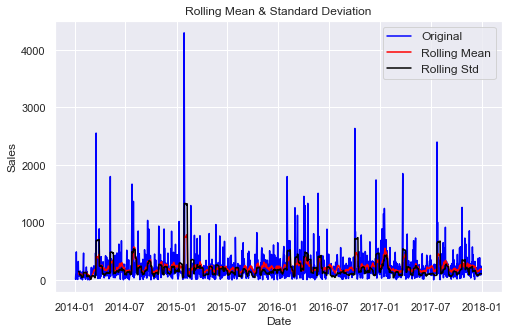

Results of ADF Test:
Test Statistic                  -20.876027
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1455.000000
Critical Value (1%)              -3.434852
Critical Value (5%)              -2.863528
Critical Value (10%)             -2.567829
dtype: float64

Results of KPSS Test:
Test Statistic            0.116337
p-value                   0.100000
Truncated Lag #          24.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/venkatakrishnasunkara/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [134]:
test_stationarity(data_new.Sales, do_kpss= True)

In [66]:
sales = pd.DataFrame(data_new.Sales).reset_index()

# rename columns to fit Prophet
sales.columns = ['ds', 'y']
sales.shape[0]

1458

In [67]:
from fbprophet import Prophet

X_tr = sales[:int(sales.shape[0]*0.7)]
X_tst = sales[int(sales.shape[0]*0.7):]

print("train shape",X_tr.shape)
print("test shape",X_tst.shape)

train shape (1020, 2)
test shape (438, 2)


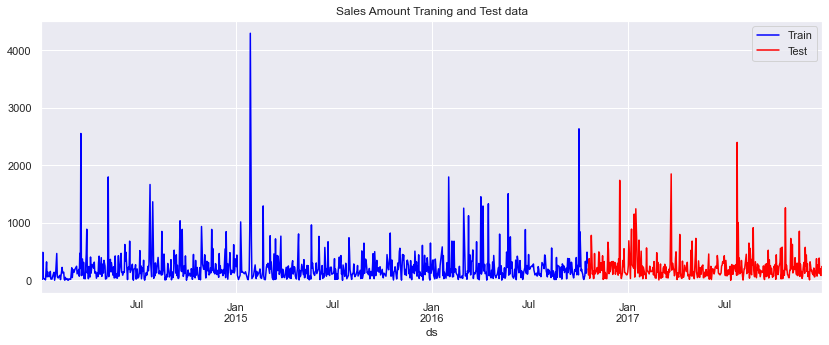

In [68]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
X_tr.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Sales Amount Traning and Test data')
plt.show()

In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [99]:
model_fb =Prophet(daily_seasonality=True )
model_fb.fit(X_tr)
X_tr_forecast = model_fb.predict(X_tr)
print('RMSE on train: ', mean_squared_error(X_tr['y'], X_tr_forecast['yhat'], squared=False))
X_tst_forecast = model_fb.predict(X_tst)
print('RMSE on test: ', mean_squared_error(X_tst['y'], X_tst_forecast['yhat'], squared=False))
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

RMSE on train:  274.1937992947828
RMSE on test:  242.5465766622908


,ds,yhat,yhat_lower,yhat_upper
431,2017-12-24,253.672408,-96.253048,610.793274
432,2017-12-25,256.944111,-76.316834,608.097975
433,2017-12-26,269.657740,-82.565697,648.226513
434,2017-12-27,241.952096,-116.535499,620.022642
435,2017-12-28,231.649471,-148.345765,587.921729
436,2017-12-29,237.862969,-135.901774,593.087620
437,2017-12-30,214.233276,-123.252766,586.897031


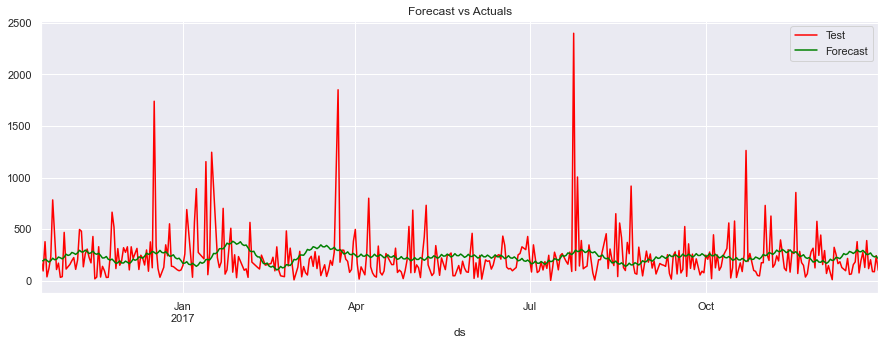

MAPE 153.9406


In [135]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAPE",round(mape,4))

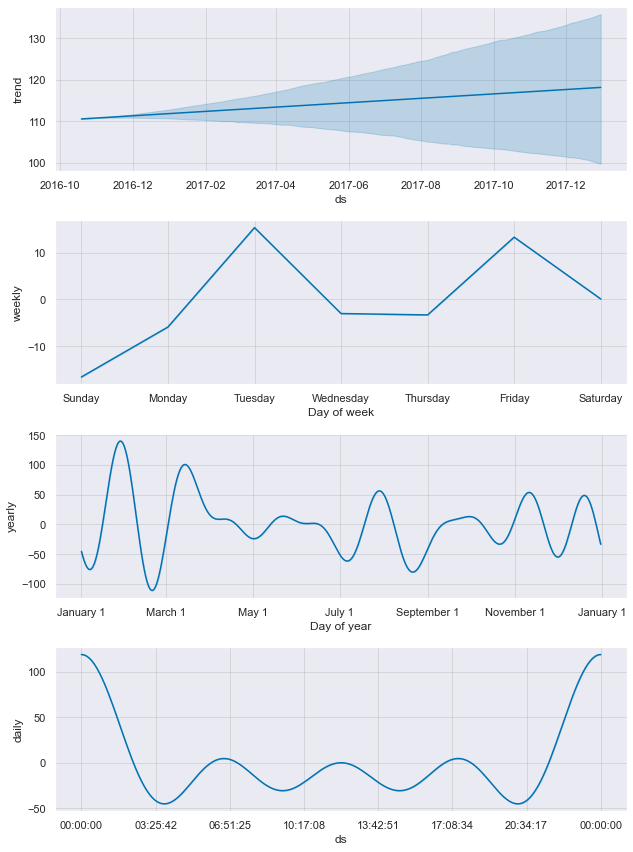

In [102]:
fig=model_fb.plot_components(X_tst_forecast)

In [136]:
# parameter tuning 
import holidays

holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2017,2018,2019]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

holiday.head()

,ds,holiday
0,2017-01-01,US-Holidays
1,2017-01-02,US-Holidays
2,2017-01-16,US-Holidays
3,2017-02-20,US-Holidays
4,2017-05-29,US-Holidays


In [137]:
#train model with holidays
model_with_holidays = Prophet(holidays=holiday,daily_seasonality=True )
model_with_holidays.fit(X_tr)

X_tr_forecast_holiday = model_with_holidays.predict(X_tr)
print('RMSE on train: ', mean_squared_error(X_tr['y'], X_tr_forecast_holiday['yhat'], squared=False))
X_tst_forecast_holiday = model_with_holidays.predict(X_tst)
print('RMSE on test: ', mean_squared_error(X_tst['y'], X_tst_forecast_holiday['yhat'], squared=False))
X_tst_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

RMSE on train:  274.1937992947828
RMSE on test:  242.5465766622908


,ds,yhat,yhat_lower,yhat_upper
431,2017-12-24,253.672408,-106.533371,603.180682
432,2017-12-25,256.944111,-94.858397,620.869000
433,2017-12-26,269.657740,-82.238459,605.177007
434,2017-12-27,241.952096,-94.110133,585.838024
435,2017-12-28,231.649471,-153.591590,574.095983
436,2017-12-29,237.862969,-139.465329,556.149862
437,2017-12-30,214.233276,-152.100597,569.080807


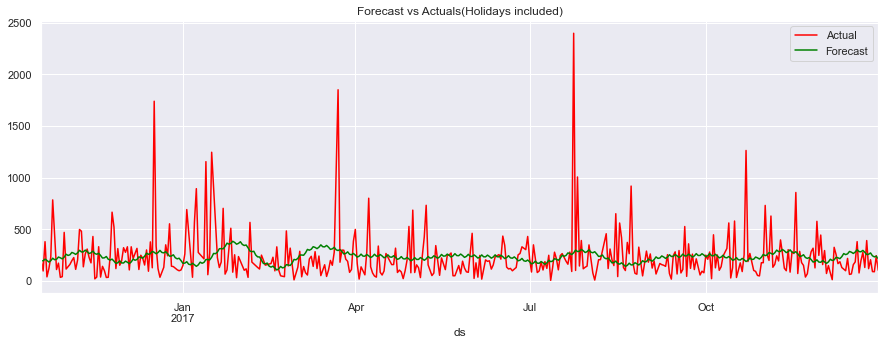

MAPE 153.9406


In [142]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_forecast_holiday.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals(Holidays included)')
plt.show()
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast_holiday['yhat'])
print("MAPE",round(mape,4))


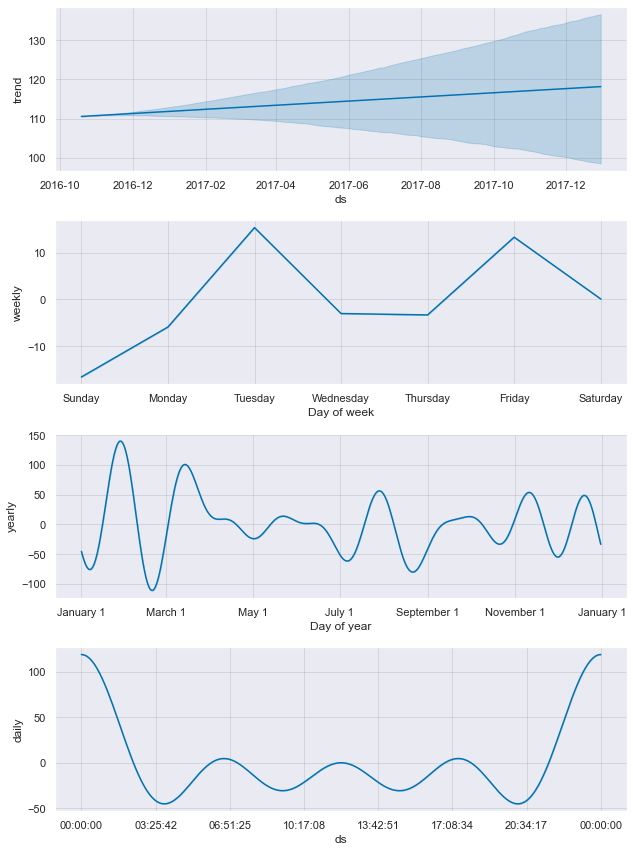

In [141]:
fig=model_fb.plot_components(X_tst_forecast_holiday)